In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
citydf = pd.read_csv(city_data_to_load)
citydf.head()
ridedf = pd.read_csv(ride_data_to_load)
ridedf.head()

# Combine the data into a single dataset
cityride = pd.merge(ridedf,citydf,on = "city", how = "left")

# Display the data table for preview
cityride.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

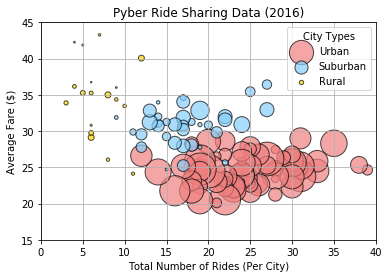

In [2]:
# Obtain the x and y coordinates for each of the three city types
urban_df = cityride.loc[cityride['type'] == 'Urban']
suburban_df = cityride.loc[cityride['type'] == 'Suburban']
rural_df = cityride.loc[cityride['type'] == 'Rural']

ridecount_urban = urban_df['city'].value_counts()
ridecount_suburban = suburban_df['city'].value_counts()
ridecount_rural = rural_df['city'].value_counts()

grouped_urban = urban_df.groupby(['city'])
avg_urbanfare = grouped_urban['fare'].mean()
grouped_suburban = suburban_df.groupby(['city'])
avg_suburbanfare = grouped_suburban['fare'].mean()
grouped_rural = rural_df.groupby(['city'])
avg_ruralfare = grouped_rural['fare'].mean()

urban_drv = urban_df.groupby(['city'])
urbandrv_count = urban_drv['driver_count'].sum() / 2
suburban_drv = suburban_df.groupby(['city'])
suburbandrv_count = suburban_drv['driver_count'].sum() / 2
rural_drv = rural_df.groupby(['city'])
ruraldrv_count = rural_drv['driver_count'].sum() / 2

# Build the scatter plots for each city types
urban = plt.scatter(ridecount_urban, avg_urbanfare, marker = 'o', color = 'lightcoral', 
                    edgecolor = 'black', s = urbandrv_count, alpha = .70)
suburban = plt.scatter(ridecount_suburban, avg_suburbanfare, marker = 'o', color = 'lightskyblue', 
                    edgecolor = 'black', s = suburbandrv_count, alpha = .7)
rural = plt.scatter(ridecount_rural, avg_ruralfare, marker = 'o', color = 'gold', 
                    edgecolor = 'black', s = ruraldrv_count, alpha = .7)

# Incorporate the other graph properties
plt.ylim(15, 45)
plt.xlim(0, 40)
plt.grid()
plt.ylabel('Average Fare ($)')
plt.xlabel('Total Number of Rides (Per City)')
plt.title('Pyber Ride Sharing Data (2016)')

# Create a legend
plt.legend(labels = ['Urban', 'Suburban', 'Rural'], title = 'City Types')

# Incorporate a text label regarding circle size

# Save Figure
plt.savefig('PyberRideScatterPlot.png')

In [3]:
# Show Figure
plt.show()

## Total Fares by City Type

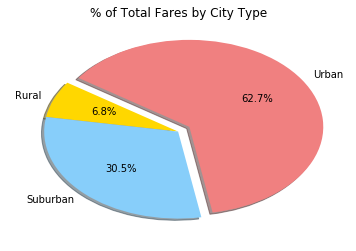

In [4]:
# Calculate Type Percents
city_types = ['Urban', 'Rural', 'Suburban']
colors = ['lightcoral', 'gold', 'lightskyblue']
fares_pct = []

for fares in city_types:
    pctdf = cityride.loc[cityride['type'] == fares]
    fares_pct.append(pctdf['fare'].sum() / cityride['fare'].sum())
    
# Build Pie Chart
plt.pie(fares_pct, labels = city_types, colors = colors, startangle = 280, explode = [.1, 0, 0], autopct="%1.1f%%", shadow = True)
plt.title('% of Total Fares by City Type')

# Save Figure
plt.savefig('TotalFaresbyCityType.png')

In [5]:
# Show Figure
plt.show()

## Total Rides by City Type

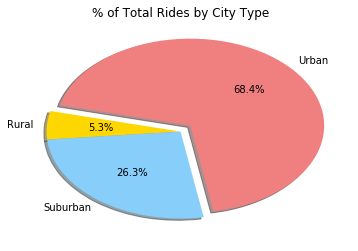

In [6]:
# Calculate Ride Percents
city_types = ['Urban', 'Rural', 'Suburban']
colors = ['lightcoral', 'gold', 'lightskyblue']
rides_pct = []

for riders in city_types:
    ridesdf = cityride.loc[cityride['type'] == riders]
    rides_pct.append(ridesdf['ride_id'].count() / cityride['ride_id'].count())
    
# Build Pie Chart
plt.pie(rides_pct, labels = city_types, colors = colors, startangle = 280, explode = [.1, 0, 0], autopct="%1.1f%%", shadow = True)
plt.title('% of Total Rides by City Type')

# Save Figure
plt.savefig('TotalRidesbyCityType.png')

In [7]:
# Show Figure
plt.show()

## Total Drivers by City Type

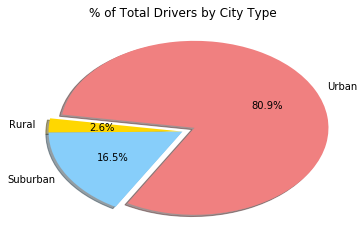

In [9]:
# Calculate Ride Percents
city_types = ['Urban', 'Rural', 'Suburban']
colors = ['lightcoral', 'gold', 'lightskyblue']
drivers_pct = []

for drivers in city_types:
    driversdf = citydf.loc[citydf['type'] == drivers]
    drivers_pct.append(driversdf['driver_count'].sum() / citydf['driver_count'].count())

# Build Pie Chart
plt.pie(drivers_pct, labels = city_types, colors = colors, startangle = 240, 
        explode = [.1, 0, 0], autopct="%1.1f%%", shadow = True)
plt.title('% of Total Drivers by City Type')

# Save Figure
plt.savefig('TotalDriversbyCityType.png')

In [ ]:
# Show Figure
plt.show()